In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.neighbors import kneighbors_graph
from scipy import sparse
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score, completeness_score,v_measure_score
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline


random_state = 213
np.random.seed(random_state)

In [2]:
data_size = 150
features,y = make_blobs(n_samples=data_size, centers=3, random_state=213)
#print(x.shape, y.shape)

data_size = features.shape[0]

In [3]:
features.shape, y.shape

((150, 2), (150,))

In [4]:
n_neighbors = 8
knn_dist_graph = kneighbors_graph(X=features, 
                             n_neighbors=n_neighbors,
                             mode='distance',
                             metric='euclidean',
                             n_jobs=6)
n_neighbors

8

In [5]:
knn_dist_graph.shape

(150, 150)

In [6]:
knn_dist_graph.todense()[0][:,:50]

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.91788813, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.86848119,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.99694799,
         0.        , 0.07901512, 0.        , 0.        , 0.        ]])

In [7]:
sigma = 1

In [8]:
sigma = 1
similarity_graph = sparse.csr_matrix(knn_dist_graph.shape)
nzeroindices = knn_dist_graph.nonzero()
similarity_graph [nzeroindices] = np.iterable(np.asarray(knn_dist_graph[nzeroindices])**2 / 2.0 * sigma**2)
similarity_graph = 0.5 * (similarity_graph + similarity_graph.T)
similarity_graph.todense()[0][:,:50]

C:\Users\Muhammad Jamal Ahmed\Anaconda3\lib\site-packages\scipy\sparse\_index.py:127: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


matrix([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. ,
         0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 1. , 0. , 1. , 0. , 0. , 0. ]])

In [9]:
similarity_graph = 0.5 * (similarity_graph + similarity_graph.T)

In [10]:
similarity_graph.todense()[0][:,:50]

matrix([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. ,
         0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 1. , 0. , 1. , 0. , 0. , 0. ]])

C:\Users\Muhammad Jamal Ahmed\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


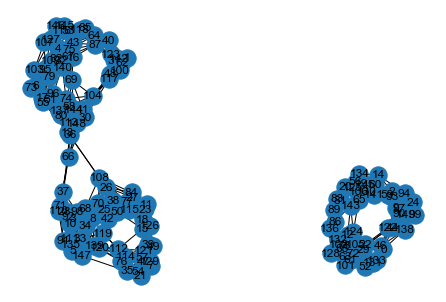

In [11]:
# Let's see how the graph looks like
nx_graph = nx.from_scipy_sparse_matrix(similarity_graph)

nx.draw(nx_graph, with_labels=True)
plt.show()

In [12]:
degree_matrix = similarity_graph.sum(axis=1)
degree_matrix.shape

(150, 1)

In [13]:
degree_matrix[:10]

matrix([[ 7. ],
        [ 6. ],
        [ 8.5],
        [ 9.5],
        [11.5],
        [ 6.5],
        [ 6. ],
        [ 8. ],
        [10.5],
        [ 9.5]])

In [14]:
# Checking for outlier data point having no neighbor i.e degree = 0
degree_matrix[degree_matrix == 0]

matrix([], shape=(1, 0), dtype=float64)

In [15]:
np.asarray(degree_matrix).shape

(150, 1)

In [16]:
np.diag(np.asarray(degree_matrix).reshape(data_size,))

array([[7. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 6. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 8.5, ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 6. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 6.5, 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 8.5]])

In [17]:
diagonal_matrix = np.diag(np.asarray(degree_matrix).reshape(data_size,))
L =  diagonal_matrix - similarity_graph

In [18]:
L

matrix([[7. , 0. , 0. , ..., 0. , 0. , 0. ],
        [0. , 6. , 0. , ..., 0. , 0. , 0. ],
        [0. , 0. , 8.5, ..., 0. , 0. , 0. ],
        ...,
        [0. , 0. , 0. , ..., 6. , 0. , 0. ],
        [0. , 0. , 0. , ..., 0. , 6.5, 0. ],
        [0. , 0. , 0. , ..., 0. , 0. , 8.5]])

In [19]:
# We can also obtain the Laplacian using scipy 

L = sparse.csgraph.laplacian(csgraph=similarity_graph)

In [20]:
x = np.ones(shape=(data_size,1), dtype=int)

Q = np.dot(np.dot(x.T, L.todense()), x)

Q.round(10)

array([[0.]])

In [21]:
# Finding eigen values and eigen vectors
e, evecs = np.linalg.eig(L.todense())
e.shape, evecs.shape

((150,), (150, 150))

In [22]:
# No. of eigen values equal to 0
e_rounded_off = e.round(5)
e_rounded_off[e_rounded_off == 0].shape

(2,)

In [23]:
# No. of connected components
nx.number_connected_components(nx_graph)

2

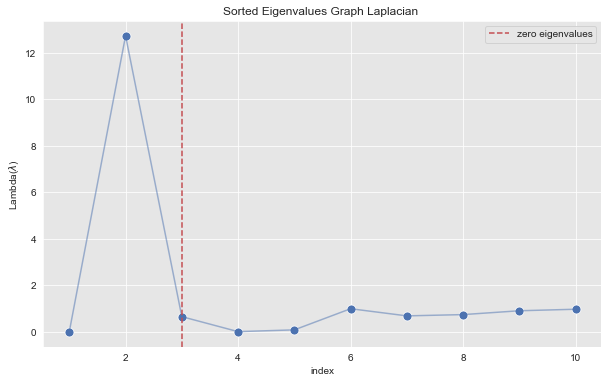

In [24]:
index_lim = 10

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, e[: index_lim].size + 1), y=e[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, e[: index_lim].size + 1), y=e[: index_lim], alpha=0.5, ax=ax)
ax.axvline(x=3, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend()
ax.set(title=f'Sorted Eigenvalues Graph Laplacian ', xlabel='index', ylabel=r'Lambda($\lambda$)');

In [25]:
#plt.figure(figsize=(8,6))
#plt.scatter(np.arange(data_size), evecs[:,1].tolist())
#plt.title("Eigen vector plot (Sorted)")
#plt.show()

In [26]:
# Sort the eigen value 
sorted_indices = np.argsort(e)

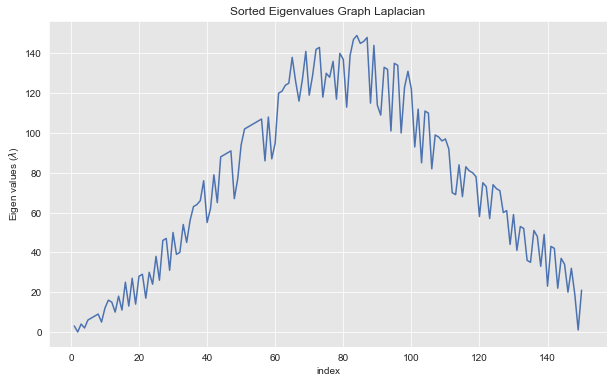

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, sorted_indices.size + 1), y=sorted_indices, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'Eigen values ($\lambda$)');

In [28]:
#plt.figure(figsize=(8,6))
#plt.scatter(np.arange(data_size), e)
#plt.title("Eigen values plot")
#plt.show()

In [29]:
#plt.figure(figsize=(8,6))
#plt.scatter(np.arange(data_size), np.sort(e))
#plt.title("Eigen values plot (Sorted)")
#plt.show()

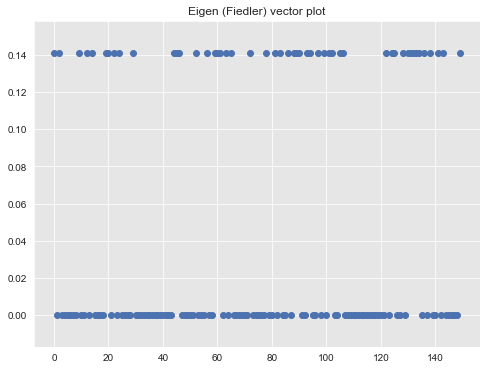

In [30]:
# Get smallest non-zero eigen value's index for obtaining partition to cluster
fiedler_index = sorted_indices[1]
fiedler_index

# The eigen vector for smallest non-zero eigen value i.e plotting the Fiedler vector
# Plotting eigen values
plt.figure(figsize=(8,6))
plt.scatter(np.arange(data_size), evecs[:,fiedler_index].tolist())
plt.title("Eigen (Fiedler) vector plot")
plt.show()

fiedler_vector = evecs[:,fiedler_index].copy()

# Thresholding the values in this eigen vector at 0
fiedler_vector[fiedler_vector < 0.0] = 0
fiedler_vector[fiedler_vector > 0.0] = 1

new_labels = np.asarray(fiedler_vector)[:,0]

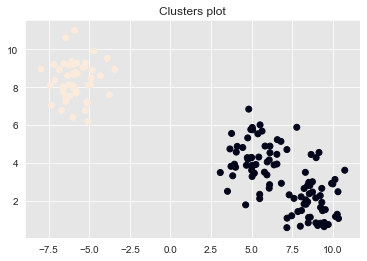

In [31]:
plt.scatter(features[:,0], features[:,1], c=new_labels.astype(float))
plt.title("Clusters plot")
plt.show()

In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

from sklearn.neighbors import kneighbors_graph
from scipy import sparse
import networkx as nx

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
from sklearn.datasets import make_blobs
#from imblearn.over_sampling import RandomOverSampler
#from collections import Counter

data_size = 300
features,y = make_blobs(n_samples=data_size, centers=3, random_state=213)
#print(x.shape, y.shape)


# define oversampling strategy
#oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
#features_over, y_over = oversample.fit_resample(features, y)
# summarize class distribution
#print(Counter(y_over))

#data_size = features.reshape(1, -1)
data_size = features.shape[0]


features.shape, y.shape
#features.reshape(1, -1)

((300, 2), (300,))

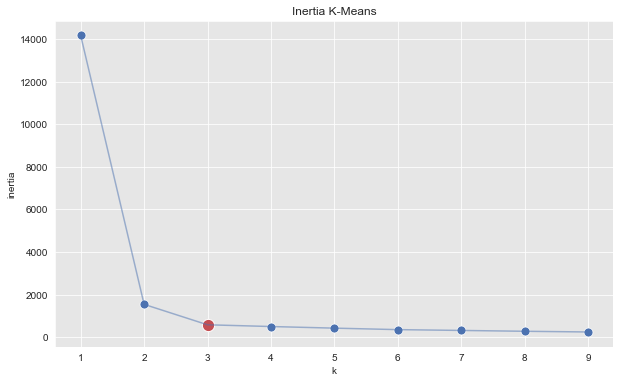

In [3]:
inertias = []

k_candidates = range(1, 10)

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    k_means.fit(features)
    inertias.append(k_means.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=k_candidates, y = inertias, s=80, ax=ax)
sns.scatterplot(x=[k_candidates[2]], y = [inertias[2]], color=sns_c[3], s=150, ax=ax)
sns.lineplot(x=k_candidates, y = inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k');

In [4]:
n_neighbors = 8
knn_dist_graph = kneighbors_graph(X=features, 
                             n_neighbors=n_neighbors,
                             mode='distance',
                             metric='euclidean',
                             n_jobs=6)
n_neighbors

8

In [5]:
knn_dist_graph.shape

(300, 300)

In [6]:
knn_dist_graph.todense()[0][:,:50]

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.08056024, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.21139448, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.4538619 , 0.        , 0.        , 0.        ]])

In [7]:
sigma = 1
similarity_graph = sparse.csr_matrix(knn_dist_graph.shape)
nzeroindices = knn_dist_graph.nonzero()
similarity_graph [nzeroindices] = np.iterable(np.asarray(knn_dist_graph[nzeroindices])**2 / 2.0 * sigma**2)
similarity_graph = 0.5 * (similarity_graph + similarity_graph.T)
similarity_graph.todense()[0][:,:50]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\sparse\_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


matrix([[0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ]])

In [8]:
similarity_graph = 0.5 * (similarity_graph + similarity_graph.T)

In [9]:
similarity_graph.todense()[0][:,:100]

matrix([[0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0.5,
         0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

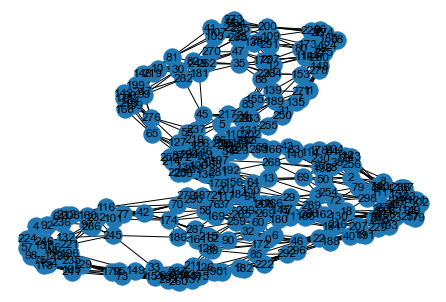

In [10]:
# Let's see how the graph looks like
nx_graph = nx.from_scipy_sparse_matrix(similarity_graph)

nx.draw(nx_graph, with_labels=True)
plt.show()

In [11]:
degree_matrix = similarity_graph.sum(axis=1)
degree_matrix.shape

(300, 1)

In [12]:
degree_matrix[:10]

matrix([[ 7.5],
        [ 7. ],
        [10. ],
        [ 6.5],
        [ 5.5],
        [ 8. ],
        [ 8.5],
        [ 5. ],
        [ 9. ],
        [ 7.5]])

In [13]:
# Checking for outlier data point having no neighbor i.e degree = 0
degree_matrix[degree_matrix == 0]

matrix([], shape=(1, 0), dtype=float64)

In [14]:
np.asarray(degree_matrix).shape

(300, 1)

In [15]:
np.diag(np.asarray(degree_matrix).reshape(data_size,))

array([[ 7.5,  0. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  7. ,  0. , ...,  0. ,  0. ,  0. ],
       [ 0. ,  0. , 10. , ...,  0. ,  0. ,  0. ],
       ...,
       [ 0. ,  0. ,  0. , ...,  9.5,  0. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. , 10. ,  0. ],
       [ 0. ,  0. ,  0. , ...,  0. ,  0. , 10. ]])

In [16]:
diagonal_matrix = np.diag(np.asarray(degree_matrix).reshape(data_size,))
L =  diagonal_matrix - similarity_graph

In [17]:
L

matrix([[ 7.5,  0. ,  0. , ...,  0. ,  0. ,  0. ],
        [ 0. ,  7. ,  0. , ...,  0. ,  0. ,  0. ],
        [ 0. ,  0. , 10. , ...,  0. ,  0. ,  0. ],
        ...,
        [ 0. ,  0. ,  0. , ...,  9.5,  0. ,  0. ],
        [ 0. ,  0. ,  0. , ...,  0. , 10. ,  0. ],
        [ 0. ,  0. ,  0. , ...,  0. ,  0. , 10. ]])

In [18]:
#We can also obtain the Laplacian using scipy 

L = sparse.csgraph.laplacian(csgraph=similarity_graph)

In [19]:
x = np.ones(shape=(data_size,1), dtype=int)

Q = np.dot(np.dot(x.T, L.todense()), x)

Q.round(10)

array([[0.]])

In [20]:
# Finding eigen values and eigen vectors
e, evecs = np.linalg.eig(L.todense())
e.shape, evecs.shape

((300,), (300, 300))

In [21]:
# No. of eigen values equal to 0
e_rounded_off = e.round(5)
e_rounded_off[e_rounded_off == 0].shape

(2,)

In [22]:
# No. of connected components
nx.number_connected_components(nx_graph)

2

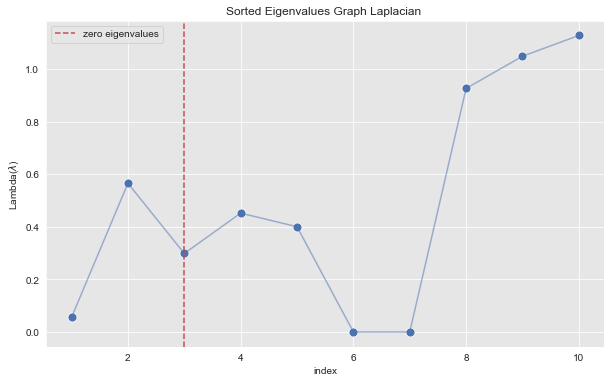

In [23]:
index_lim = 10

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, e[: index_lim].size + 1), y=e[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, e[: index_lim].size + 1), y=e[: index_lim], alpha=0.5, ax=ax)
ax.axvline(x=3, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend()
ax.set(title=f'Sorted Eigenvalues Graph Laplacian ', xlabel='index', ylabel=r'Lambda($\lambda$)');

In [24]:
# Sort the eigen value 
sorted_indices = np.argsort(e)

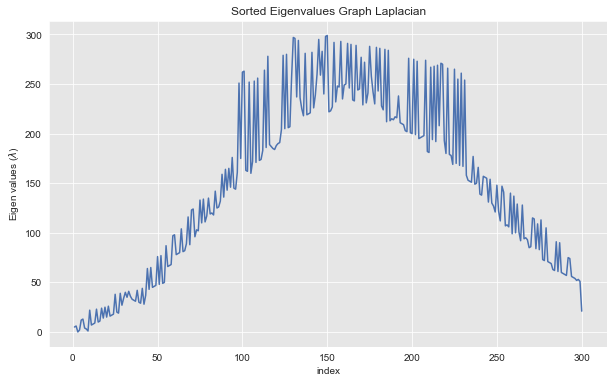

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, sorted_indices.size + 1), y=sorted_indices, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'Eigen values ($\lambda$)');

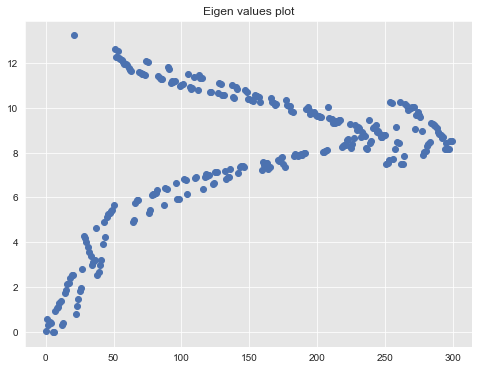

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(np.arange(data_size), e)
plt.title("Eigen values plot")
plt.show()

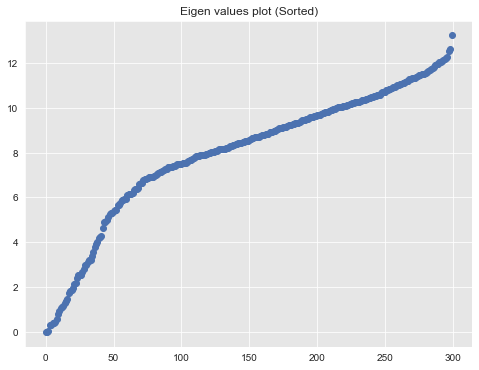

In [28]:
plt.figure(figsize=(8,6))
plt.scatter(np.arange(data_size), np.sort(e))
plt.title("Eigen values plot (Sorted)")
plt.show()

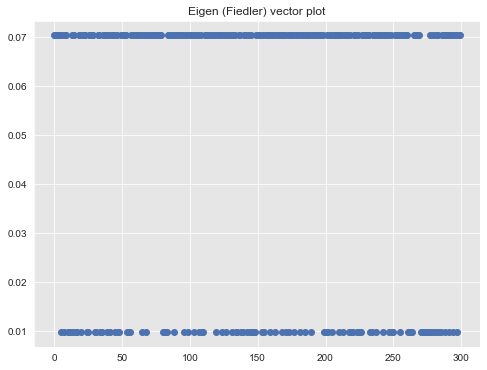

In [29]:
# Get smallest non-zero eigen value's index for obtaining partition to cluster
fiedler_index = sorted_indices[1]
fiedler_index

# The eigen vector for smallest non-zero eigen value i.e plotting the Fiedler vector
# Plotting eigen values
plt.figure(figsize=(8,6))
plt.scatter(np.arange(data_size), evecs[:,fiedler_index].tolist())
plt.title("Eigen (Fiedler) vector plot")
plt.show()

fiedler_vector = evecs[:,fiedler_index].copy()

# Thresholding the values in this eigen vector at 0
fiedler_vector[fiedler_vector < 0.0] = 0
fiedler_vector[fiedler_vector > 0.0] = 1

new_labels = np.asarray(fiedler_vector)[:,0]

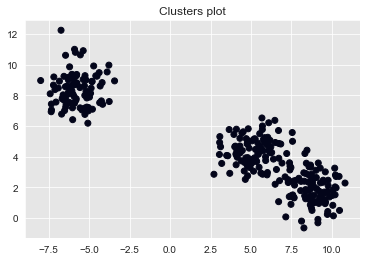

In [30]:
plt.scatter(features[:,0], features[:,1], c=new_labels.astype(float))
plt.title("Clusters plot")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


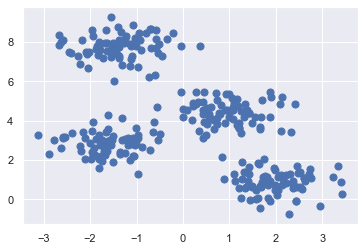

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);


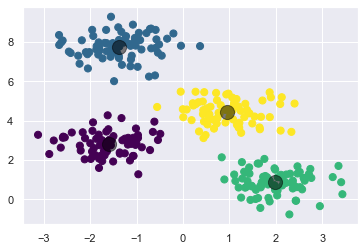

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


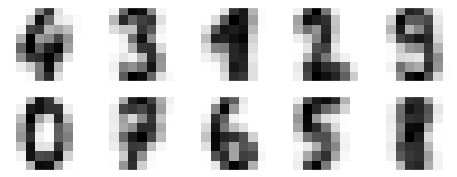

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)


In [37]:
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]


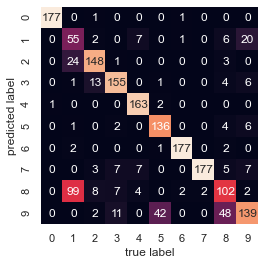

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)
0.7935447968836951
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=digits.target_names,
yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');
